#Install Library

Install library yang dibutuhkan

In [ ]:
!pip install hpelm scikit-learn pandas openpyxl matplotlib
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 91.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
db-dtypes 1.4.3 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
x

Import library yang akan digunakan

In [ ]:
!pip install elm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.6/936.6 kB 29.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from hpelm import ELM
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

#Load & Preprocessing Data

Load data yang akan diproses

In [ ]:
file_path = "/content/Data Baru revisilagi.xlsx"  # Tentukan path file Excel yang akan dibaca
df = pd.read_excel(file_path, header=3)  # Baca file Excel mulai dari baris ke-4 (index 3), lalu hapus baris yang mengandung nilai kosong (NaN)

Cek kolom untuk memastikan data yang akan diproses

In [ ]:
print(df)

      No  Umur  Jenis Kelamin  Nyeri Dada Saat Beraktivitas  Tekanan Darah  \
0      1    37              2                             3            130   
1      2    41              1                             1            130   
2      3    56              2                             1            120   
3      4    57              1                             4            120   
4      5    57              2                             3            140   
..   ...   ...            ...                           ...            ...   
516  517    52              2                             1            118   
517  518    59              2                             1            160   
518  519    59              2                             1            134   
519  520    45              2                             1            110   
520  521    58              1                             1            121   

     Kadar Kolesterol  Gula Darah  Hasil Uji EKG  Denyut Jantun

Hapus kolom 'No' karena bukan termasuk data prediktif

In [ ]:
df = df.drop(columns=["No"])

Ubah data 'Jenis Kelamin' kedalam bentuk biner

In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace({1: 0, 2: 1})

Menentukan target untuk memprediksi

In [ ]:
X = df.drop(columns=["Prediksi"])
y = df["Prediksi"]

Preprocessing data jika target bukan numerik, encode ke angka

Membagi data training 70% dan data testing 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

Normalisasi data agar lebih optimal

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled,
                                               y_train)

Mengubah label target menjadi bentuk numerik biner (one-hot) agar bisa digunakan oleh model ELM untuk klasifikasi.

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(
                  y_train_smote.values.reshape(-1, 1))

#Implementasi model ELM

Traning model ELM

In [ ]:
elm = ELM(X_train_scaled.shape[1],
          y_train_encoded.shape[1],
          classification="c")
elm.add_neurons(100, "sigm")
elm.train(X_train_smote, y_train_encoded)

Prediksi & evaluasi model ELM

In [ ]:
y_pred = elm.predict(X_test_scaled).argmax(axis=1)
y_test_encoded = encoder.transform(
                 y_test.values.reshape(-1, 1)).argmax(axis=1)

In [ ]:
print("Akurasi:", accuracy_score(y_test_encoded, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

Akurasi: 0.7643312101910829

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       0.81      0.79      0.80        28
           2       0.61      0.71      0.66        31
           3       0.66      0.57      0.61        37
           4       0.85      0.82      0.84        34

    accuracy                           0.76       157
   macro avg       0.77      0.78      0.77       157
weighted avg       0.76      0.76      0.76       157



Save model

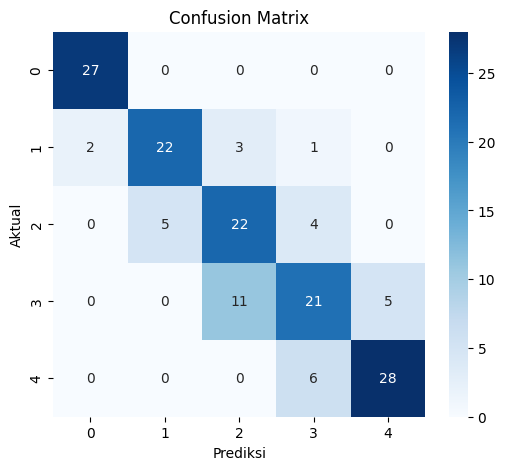

In [ ]:
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
elm.save("elm_model.h5") # Save model using elm.save()
joblib.dump(scaler, "scaler.pkl")
joblib.dump(encoder, "encoder.pkl")

['encoder.pkl']

In [ ]:
# Lihat distribusi kelas di dataset asli
print("Distribusi Kelas (Total):")
print(y.value_counts())
print()

# Lihat distribusi kelas pada data training
print("Distribusi Kelas (Training):")
print(y_train.value_counts())
print()

# Lihat distribusi kelas pada data testing
print("Distribusi Kelas (Testing):")
print(y_test.value_counts())

Distribusi Kelas (Total):
Prediksi
3    123
4    113
2    101
1     93
0     91
Name: count, dtype: int64

Distribusi Kelas (Training):
Prediksi
3    86
4    79
2    70
1    65
0    64
Name: count, dtype: int64

Distribusi Kelas (Testing):
Prediksi
3    37
4    34
2    31
1    28
0    27
Name: count, dtype: int64


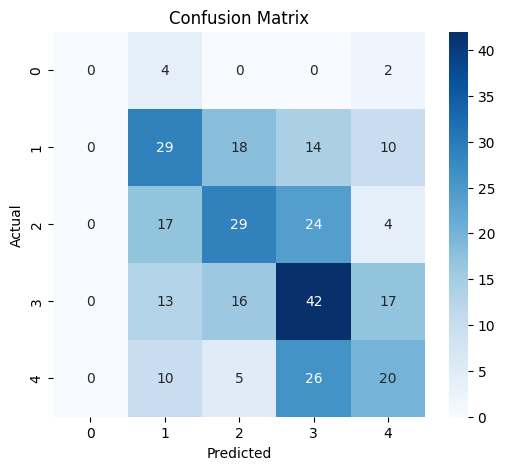

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.categories_[0],
            yticklabels=encoder.categories_[0])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

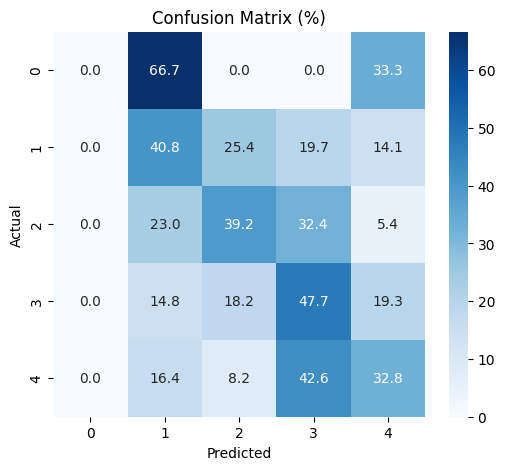

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # konversi ke %

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap="Blues",
            xticklabels=encoder.categories_[0],
            yticklabels=encoder.categories_[0])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (%)")
plt.show()
